## Assignment 2 - Task 3
**Dataset**: Stream Data Mining

**Dataset information**:
Three datasets are generated in a two-dimensional space. Each dataset consists of three clusters, each of which has 100 instances. 

**Objective**:
The objective of this task is to implement a Streaming k-means algorithm to obtain the cluster centres of each dataset and all of them as a continuous stream. 

In [1]:
# Used to get spark to work on Jupyter notebook
import findspark
findspark.init()

In [2]:
# Initialize spark session
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("CSCI316-ass2") \
    .config("spark-master", "local") \
    .getOrCreate()
spark

In [3]:
# Import relevant packages
import numpy as np
from scipy.spatial import distance
from matplotlib import pyplot as plt
from pyspark import SparkContext
from pyspark.mllib.clustering import StreamingKMeansModel
sc = SparkContext.getOrCreate()

In [4]:
# Dataset Configuration
# Dataset 1
d1_mean1 = [85, 75]
d1_cov1 = [[0, 15], [15, 0]]
d1_size1 = 150
d1_mean2 = [100, 80]
d1_cov2 = [[0, 15], [15, 0]]
d1_size2 = 150
d1_mean3 = [80, 60]
d1_cov3 = [[0, 15], [15, 0]]
d1_size3 = 150

# Dataset 2
d2_mean1 = [93, 68]
d2_cov1 = [[0, 10], [10, 0]]
d2_size1 = 150
d2_mean2 = [103, 75]
d2_cov2 = [[0, 10], [10, 0]]
d2_size2 = 150
d2_mean3 = [85, 60]
d2_cov3 = [[0, 10], [10, 0]]
d2_size3 = 150

# Dataset 3
d3_mean1 = [95, 68]
d3_cov1 = [[0, 15], [15, 0]]
d3_size1 = 150
d3_mean2 = [100, 85]
d3_cov2 = [[0, 15], [15, 0]]
d3_size2 = 150
d3_mean3 = [80, 62]
d3_cov3 = [[0, 15], [15, 0]]
d3_size3 = 150

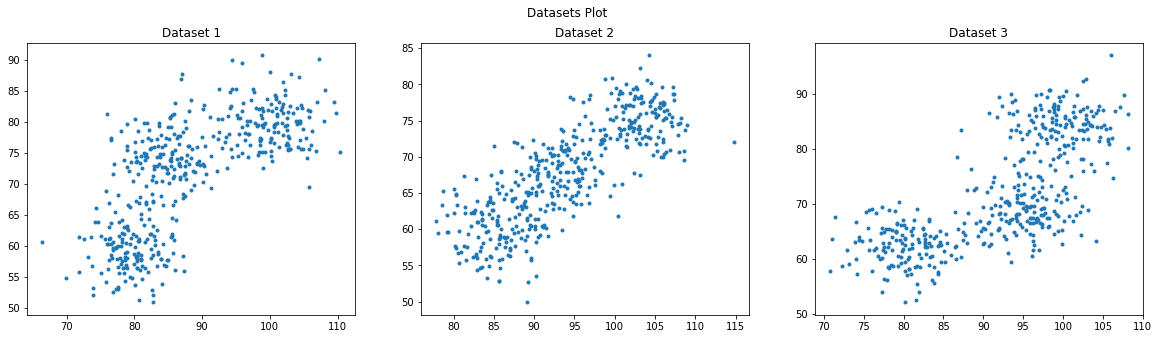

In [5]:
# Plot three datasets
# Dataset 1
d1_x1, d1_y1 = np.random.multivariate_normal(d1_mean1, d1_cov1, d1_size1).T
d1_x2, d1_y2 = np.random.multivariate_normal(d1_mean2, d1_cov2, d1_size2).T
d1_x3, d1_y3 = np.random.multivariate_normal(d1_mean3, d1_cov3, d1_size3).T
d1x = np.append(d1_x1, [d1_x2, d1_x3])
d1y = np.append(d1_y1, [d1_y2, d1_y3])

# Dataset 2
d2_x1, d2_y1 = np.random.multivariate_normal(d2_mean1, d2_cov1, d2_size1).T
d2_x2, d2_y2 = np.random.multivariate_normal(d2_mean2, d2_cov2, d2_size2).T
d2_x3, d2_y3 = np.random.multivariate_normal(d2_mean3, d2_cov3, d2_size3).T
d2x = np.append(d2_x1, [d2_x2, d2_x3])
d2y = np.append(d2_y1, [d2_y2, d2_y3])

# Dataset 3
d3_x1, d3_y1 = np.random.multivariate_normal(d3_mean1, d3_cov1, d3_size1).T
d3_x2, d3_y2 = np.random.multivariate_normal(d3_mean2, d3_cov2, d3_size2).T
d3_x3, d3_y3 = np.random.multivariate_normal(d3_mean3, d3_cov3, d3_size3).T
d3x = np.append(d3_x1, [d3_x2, d3_x3])
d3y = np.append(d3_y1, [d3_y2, d3_y3])

# Plot
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_size_inches(20, 5)
fig.suptitle('Datasets Plot')
ax1.title.set_text('Dataset 1')
ax1.plot(d1x, d1y, '.')
ax2.title.set_text('Dataset 2')
ax2.plot(d2x, d2y, '.')
ax3.title.set_text('Dataset 3')
ax3.plot(d3x, d3y, '.')
plt.show()

Read dots indicate the obtained clusters in each iteration


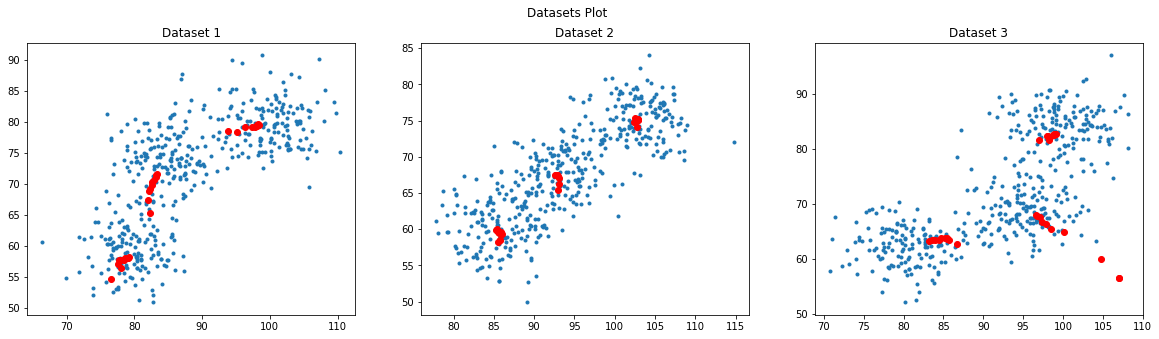

In [6]:
# Apply Spark Mllib Streaming K-means to obtain the cluster centres
# Visualise the obtained clusters in each iteration in each of the figure in the last step

# Dataset 1
d1_init_centers = [[90, 65], [95, 70], [70, 48]]
d1_init_weights = [1.0, 1.0, 1.0]

# Convert the data into stream with batches
d1_data = [[d1x[i], d1y[i]] for i in range(len(d1x))]
np.random.shuffle(d1_data)
d1_queue = np.array_split(d1_data, 10)
d1_stream = []
for entry in d1_queue:
    d1_stream += [sc.parallelize(entry)]

stkm_d1 = StreamingKMeansModel(d1_init_centers, d1_init_weights)

for i in range(10):
    stkm_d1.update(d1_stream[i], 1.0, u"batches")
    for j in range(len(stkm_d1.centers)):
        ax1.plot([stkm_d1.centers[j, 0]], [stkm_d1.centers[j, 1]], 'ro')

# Dataset 2
d2_init_centers = [[100, 60], [105, 65], [90, 50]]
d2_init_weights = [1.0, 1.0, 1.0]

# Convert the data into stream with batches
d2_data = [[d2x[i], d2y[i]] for i in range(len(d2x))]
np.random.shuffle(d2_data)
d2_queue = np.array_split(d2_data, 10)
d2_stream = []
for entry in d2_queue:
    d2_stream += [sc.parallelize(entry)]

stkm_d2 = StreamingKMeansModel(d2_init_centers, d2_init_weights)

for i in range(10):
    stkm_d2.update(d2_stream[i], 1.0, u"batches")
    for j in range(len(stkm_d2.centers)):
        ax2.plot([stkm_d2.centers[j, 0]], [stkm_d2.centers[j, 1]], 'ro')

# Dataset 3
d3_init_centers = [[110, 50], [90, 50], [90, 90]]
d3_init_weights = [1.0, 1.0, 1.0]

# Convert the data into stream with batches
d3_data = [[d3x[i], d3y[i]] for i in range(len(d3x))]
np.random.shuffle(d3_data)
d3_queue = np.array_split(d3_data, 10)
d3_stream = []
for entry in d3_queue:
    d3_stream += [sc.parallelize(entry)]

stkm_d3 = StreamingKMeansModel(d3_init_centers, d3_init_weights)

for i in range(10):
    stkm_d3.update(d3_stream[i], 1.0, u"batches")
    for j in range(len(stkm_d3.centers)):
        ax3.plot([stkm_d3.centers[j, 0]], [stkm_d3.centers[j, 1]], 'ro')

# Show plot
print('Read dots indicate the obtained clusters in each iteration')
plt.show()
fig

In [7]:
# Compare the obtained clusters with the true cluster centres by computing their Euclidean distances
print('The Euclidean distances between the obtained clusters and the true cluster centres')
print('Dataset 1 Cluster 1:', distance.euclidean(stkm_d1.centers[0], d1_mean1))
print('Dataset 1 Cluster 2:', distance.euclidean(stkm_d1.centers[1], d1_mean2))
print('Dataset 1 Cluster 3:', distance.euclidean(stkm_d1.centers[2], d1_mean3))
print('Dataset 2 Cluster 1:', distance.euclidean(stkm_d2.centers[0], d2_mean1))
print('Dataset 2 Cluster 2:', distance.euclidean(stkm_d2.centers[1], d2_mean2))
print('Dataset 2 Cluster 3:', distance.euclidean(stkm_d2.centers[2], d2_mean3))
print('Dataset 3 Cluster 1:', distance.euclidean(stkm_d3.centers[0], d3_mean1))
print('Dataset 3 Cluster 2:', distance.euclidean(stkm_d3.centers[2], d3_mean2))
print('Dataset 3 Cluster 3:', distance.euclidean(stkm_d3.centers[1], d3_mean3))

The Euclidean distances between the obtained clusters and the true cluster centres
Dataset 1 Cluster 1: 3.8638331844075067
Dataset 1 Cluster 2: 1.706986027075328
Dataset 1 Cluster 3: 1.9936068071034148
Dataset 2 Cluster 1: 0.4712066359146621
Dataset 2 Cluster 2: 0.1474363152975255
Dataset 2 Cluster 3: 0.2703089776784005
Dataset 3 Cluster 1: 1.6340324064917104
Dataset 3 Cluster 2: 2.3705169080489963
Dataset 3 Cluster 3: 3.4942740604209184


Stream dataset 1: Red
Stream dataset 2: Blue
Stream dataset 3: Green


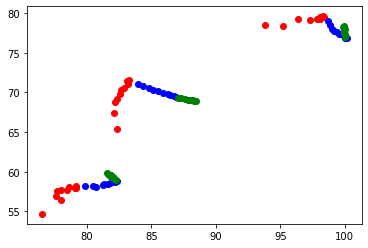

In [8]:
# Apply Spark MLlib Streaming k-means to obtain the cluster centres of the concatenated stream
# Visualise the obtained clusters in each iteration in a new figure
init_centers = [[90, 65], [95, 70], [70, 48]]
init_weights = [1.0, 1.0, 1.0]
stkm = StreamingKMeansModel(init_centers, init_weights)

# Stream dataset 1
for i in range(10):
    stkm.update(d1_stream[i], 1.0, u"batches")
    for j in range(len(stkm.centers)):
        plt.plot([stkm.centers[j, 0]], [stkm.centers[j, 1]], 'ro')

# Stream dataset 2
for i in range(10):
    stkm.update(d2_stream[i], 1.0, u"batches")
    for j in range(len(stkm.centers)):
        plt.plot([stkm.centers[j, 0]], [stkm.centers[j, 1]], 'bo')

# Stream dataset 3
for i in range(10):
    stkm.update(d3_stream[i], 1.0, u"batches")
    for j in range(len(stkm.centers)):
        plt.plot([stkm.centers[j, 0]], [stkm.centers[j, 1]], 'go')

print('Stream dataset 1: Red')
print('Stream dataset 2: Blue')
print('Stream dataset 3: Green')
plt.show()